In [36]:
import torch
import torch.nn as nn
import torchvision as tv
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm


In [11]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [12]:
ds_mist = tv.datasets.MNIST('./dataset', download = True, transform = trans)

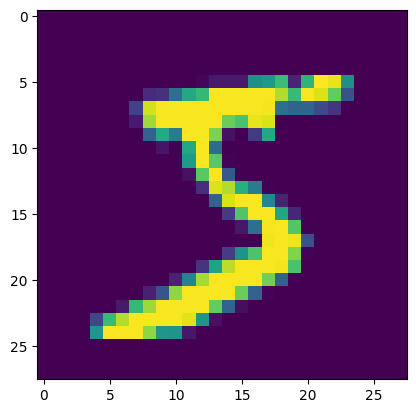

In [16]:
ds_mist[0][0].numpy()[0].shape
plt.imshow(ds_mist[0][0].numpy()[0])

In [17]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(ds_mist,batch_size=batch_size, shuffle=True,
                                         num_workers = 1, drop_last = True )


In [19]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [32]:
class Neural_nubmers(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28*28,100)
        self.linear2 = nn.Linear(100,10)
        self.act = nn.ReLU()
        
    def forward(self,x):
        out = self.flat(x)
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)
        return out
        

In [38]:
model = Neural_nubmers()

In [22]:
loss_fn = nn.CrossEntropyLoss()

In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3, momentum = 0.9) 

In [44]:
epoch = 10
for epoch in range(epoch):
    loss_val = 0
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
        label = nn.functional.one_hot(label,10).float()
        pred = model(img)
        loss = loss_fn(pred, label)
        loss.backward()
        loss_item = loss.item()
        loss_val += loss_item
        optimizer.step()
        pbar.set_description(f'loss: {loss_item: 5f}')
    print(loss_val/len(dataloader))


loss: 2.3019626140594482: 100%|███████████████████████████████████████████████████| 3750/3750 [00:14<00:00, 253.99it/s]


2.3008201107025146


loss: 2.301145553588867: 100%|████████████████████████████████████████████████████| 3750/3750 [00:14<00:00, 258.33it/s]


2.3008201077779136


loss: 2.287950038909912: 100%|████████████████████████████████████████████████████| 3750/3750 [00:14<00:00, 261.66it/s]


2.300820107460022


loss: 2.2624239921569824: 100%|███████████████████████████████████████████████████| 3750/3750 [00:14<00:00, 258.83it/s]


2.300820109685262


loss: 2.2917795181274414: 100%|███████████████████████████████████████████████████| 3750/3750 [00:15<00:00, 249.76it/s]


2.300820108985901


loss: 2.290961742401123: 100%|████████████████████████████████████████████████████| 3750/3750 [00:14<00:00, 253.32it/s]


2.3008201109568276


loss: 2.293435573577881: 100%|████████████████████████████████████████████████████| 3750/3750 [00:14<00:00, 260.45it/s]


2.3008201087315876


loss: 2.298487424850464: 100%|████████████████████████████████████████████████████| 3750/3750 [00:15<00:00, 245.66it/s]


2.300820110575358


loss: 2.301975965499878: 100%|████████████████████████████████████████████████████| 3750/3750 [00:15<00:00, 236.58it/s]


2.3008201080322266


loss: 2.2681076526641846: 100%|███████████████████████████████████████████████████| 3750/3750 [00:15<00:00, 239.98it/s]

2.300820110384623
